In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql

In [2]:
parks = pd.read_csv('archive-2/parks.csv')
species = pd.read_csv('archive-2/species.csv')

/var/folders/ly/1tqv92455b5db15clb7wtwwh0000gn/T/ipykernel_34919/549659019.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  species = pd.read_csv('archive-2/species.csv')


In [3]:
#species['scientific_name']

In [4]:
parks.shape

(56, 6)

In [5]:
parks['Park Code'].to_csv('park_codes.csv')

In [6]:
parks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Park Code  56 non-null     object 
 1   Park Name  56 non-null     object 
 2   State      56 non-null     object 
 3   Acres      56 non-null     int64  
 4   Latitude   56 non-null     float64
 5   Longitude  56 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.8+ KB


In [7]:
species.shape

(119248, 14)

In [164]:
species.columns

Index(['species_id', 'park_name', 'category', 'order', 'family',
       'scientific_name', 'common_names', 'record_status', 'occurrence',
       'nativeness', 'abundance', 'seasonality', 'conservation_status'],
      dtype='object')

In [157]:
sp_types = species['category'].value_counts()
df_sp_types = pd.DataFrame(sp_types)

Text(0.5, 1.0, 'Categories of species found in NPs')

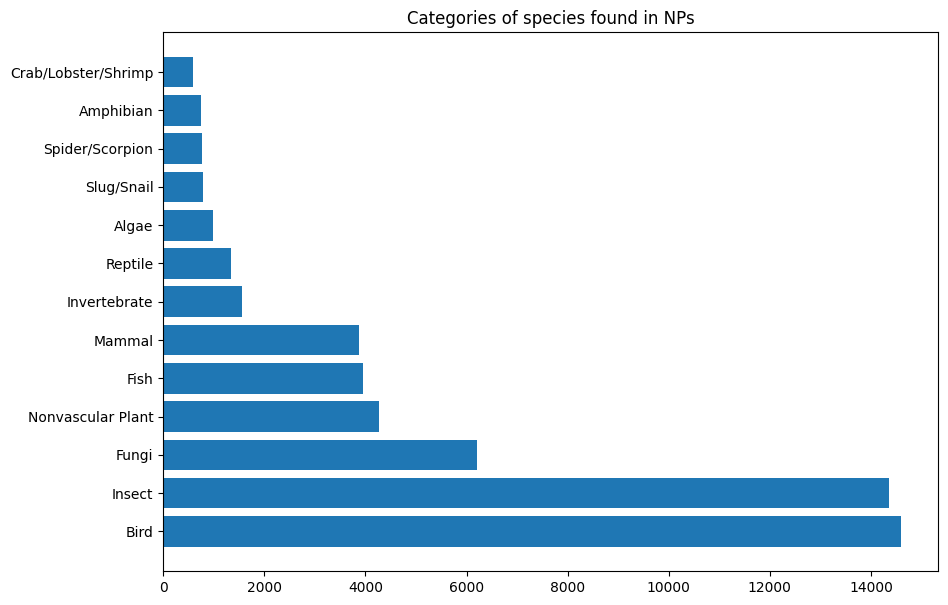

In [165]:
plt.figure(figsize=(10,7))
plt.barh(df_sp_types.index,df_sp_types['count'])
plt.title('Categories of species found in NPs')

In [9]:
parks = parks.rename(columns={'Park Code': 'park_code', 'Park Name': 'park_name', 'State': 'state', 'Acres': 'acres', 'Latitude':'latitude', 'Longitude': 'longitude'})

In [10]:
parks['area_km2'] = round(parks['acres']/247.105,0)

In [11]:
parks

,park_code,park_name,state,acres,latitude,longitude,area_km2
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,192.0
1,ARCH,Arches National Park,UT,76519,38.68,-109.57,310.0
2,BADL,Badlands National Park,SD,242756,43.75,-102.50,982.0
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,3242.0
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08,700.0
5,BLCA,Black Canyon of the Gunnison National Park,CO,32950,38.57,-107.72,133.0
6,BRCA,Bryce Canyon National Park,UT,35835,37.57,-112.18,145.0
7,CANY,Canyonlands National Park,UT,337598,38.20,-109.93,1366.0
8,CARE,Capitol Reef National Park,UT,241904,38.20,-111.17,979.0
9,CAVE,Carlsbad Caverns National Park,NM,46766,32.17,-104.44,189.0


In [12]:
#we drop this column because it's empty
species = species.drop(columns='Unnamed: 13')

In [13]:
species.columns

Index(['species_id', 'park_name', 'category', 'order', 'family',
       'scientific_name', 'common_names', 'record_status', 'occurrence',
       'nativeness', 'abundance', 'seasonality', 'conservation_status'],
      dtype='object')

In [14]:
def remove_null_fields(obj):
    return {k:v for k, v in obj.items() if v is not None}

In [39]:
#defining an activities function to extract the activities from the SQL database
def activities():
    db_conn = pymysql.connect(host="localhost", user="root", database="biodiversity",
                              password= 'Eatyourdinner0991',
                              cursorclass=pymysql.cursors.DictCursor)

    with db_conn.cursor() as cursor:
        cursor.execute("""SELECT activity,count(*) from activities_parks
                        group by activity;
        """,)
        act = cursor.fetchall()
        act = remove_null_fields(act)
        if not act:
            abort(404)

    db_conn.close()
    return act

In [83]:
#extracting the activity list using the activities function
activity_list = activities()

In [107]:
# activity_list is a list of dictionaries
data = [{'activity': d['activity'], 'count': d['count(*)']} for d in activity_list]

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data)

In [122]:
#ordering the dataframe in a descending order based on the count column
df = df.sort_values(['count'],ascending=False)

In [138]:
#renaming columns to make the figure neater
# Boolean indexing to select rows where activity is 'Junior Rangers Program'
junior_rangers_index = df['activity'] == 'Junior Ranger Program'

# Update the 'activity' column for selected rows
df.loc[junior_rangers_index, 'activity'] = 'Jr Rangers'

# Boolean indexing to select rows where activity is 'Junior Rangers Program'
tours_index = df['activity'] == 'Guided Tours'

# Update the 'activity' column for selected rows
df.loc[tours_index, 'activity'] = 'Tours'

Text(0, 0.5, 'Number of parks/activity')

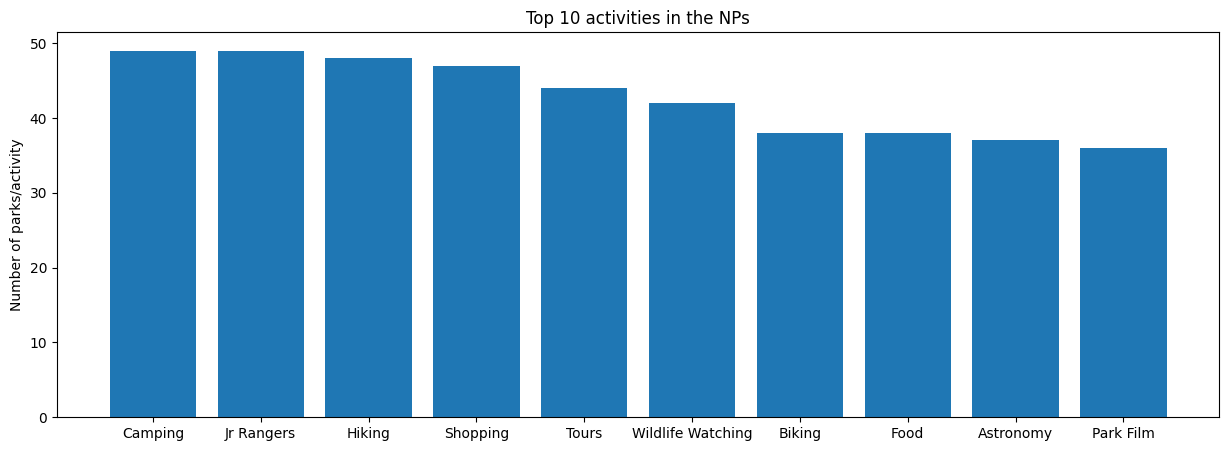

In [141]:
#make a barplot with the top10 activities
plt.figure(figsize=(15,5))
plt.bar(df.head(10)['activity'], df.head(10)['count'])
plt.title('Top 10 activities in the NPs')
plt.ylabel('Number of parks/activity')